# Analyze RP-v1.1 and RP1.3 - 16 img
I was having problem with learning rate. I set learning rate to > 0.0001. Everytime I did that it caused the model to learn nothing. I now always keep LrSchedule to false and use a single learning rate.

I am going to modify RP-v1.2 little by little untill I make the full change to resnet style.


In [5]:
import cv2
import matplotlib.pyplot as plt
import torch
from detector import *
from dope_utilities import *

## Load Data and Models

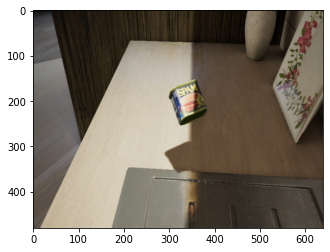

In [6]:
## Select epoch number of DOPE and ResPose to comapre
rp_epoch = 60
rp2_epoch = 60



# load color image
data_path = 'Dataset/dev_batch/'
index = 0
in_img, beliefsTruths, _ = get_truth_maps(data_path, index)

width,height = 480,640
# in_img = cv2.imread(img_path)
in_img = cv2.resize(in_img, (height, width))
# in_img = cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB)
plt.imshow(in_img)

In [7]:
# Misc
name = 'meat' # Not useful
gpu_id = 1 # which gpu to use
device = torch.device("cuda:"+str(gpu_id))

# ResPose - Select weight
network="ResPose"
# net_path = "weights/rp_meat_v1.1_16img/net_epoch_" + str(rp_epoch) + '.pth'
net_path = "weights/rp_meat_16img/net_epoch_" + str(rp_epoch) + '.pth'
model = ModelData(name, net_path, gpu_id, network)
model.load_net_model()
rp_model = model.net

## ResPose2 - Select weight
network="ResPose2"
net_path = 'weights/rp1.3BN_meat_16img/net_epoch_' + str(rp2_epoch) + '.pth'
# net_path = 'weights/rp2_meat_lr/net_epoch_' + str(rp2_epoch) + '.pth'
# net_path = 'weights/rp2_meat_16img_Lr/net_epoch_' + str(rp2_epoch) + '.pth'
model = ModelData(name, net_path, gpu_id, network)
model.load_net_model()
rp2_model = model.net



Loading DOPE model 'weights/rp_meat_16img/net_epoch_60.pth'...
Training network without imagenet weights.
    Model loaded in 3.4573616981506348 seconds.
Loading DOPE model 'weights/rp1.3BN_meat_16img/net_epoch_60.pth'...
Training network pretrained on imagenet.
Loading vgg pretrained weights from : weights/vgg19-dcbb9e9d.pth
    Model loaded in 3.66219425201416 seconds.


## Belief Maps Comparison
Belief Maps (6th cascade's output) from both the netowrks are compared side by side. The maps are overlaid on top of the original input image. Belief maps are thresholded to display the top 90% predicted locations.

ResPose Epoch: 60
ResPose2 Epoch: 60


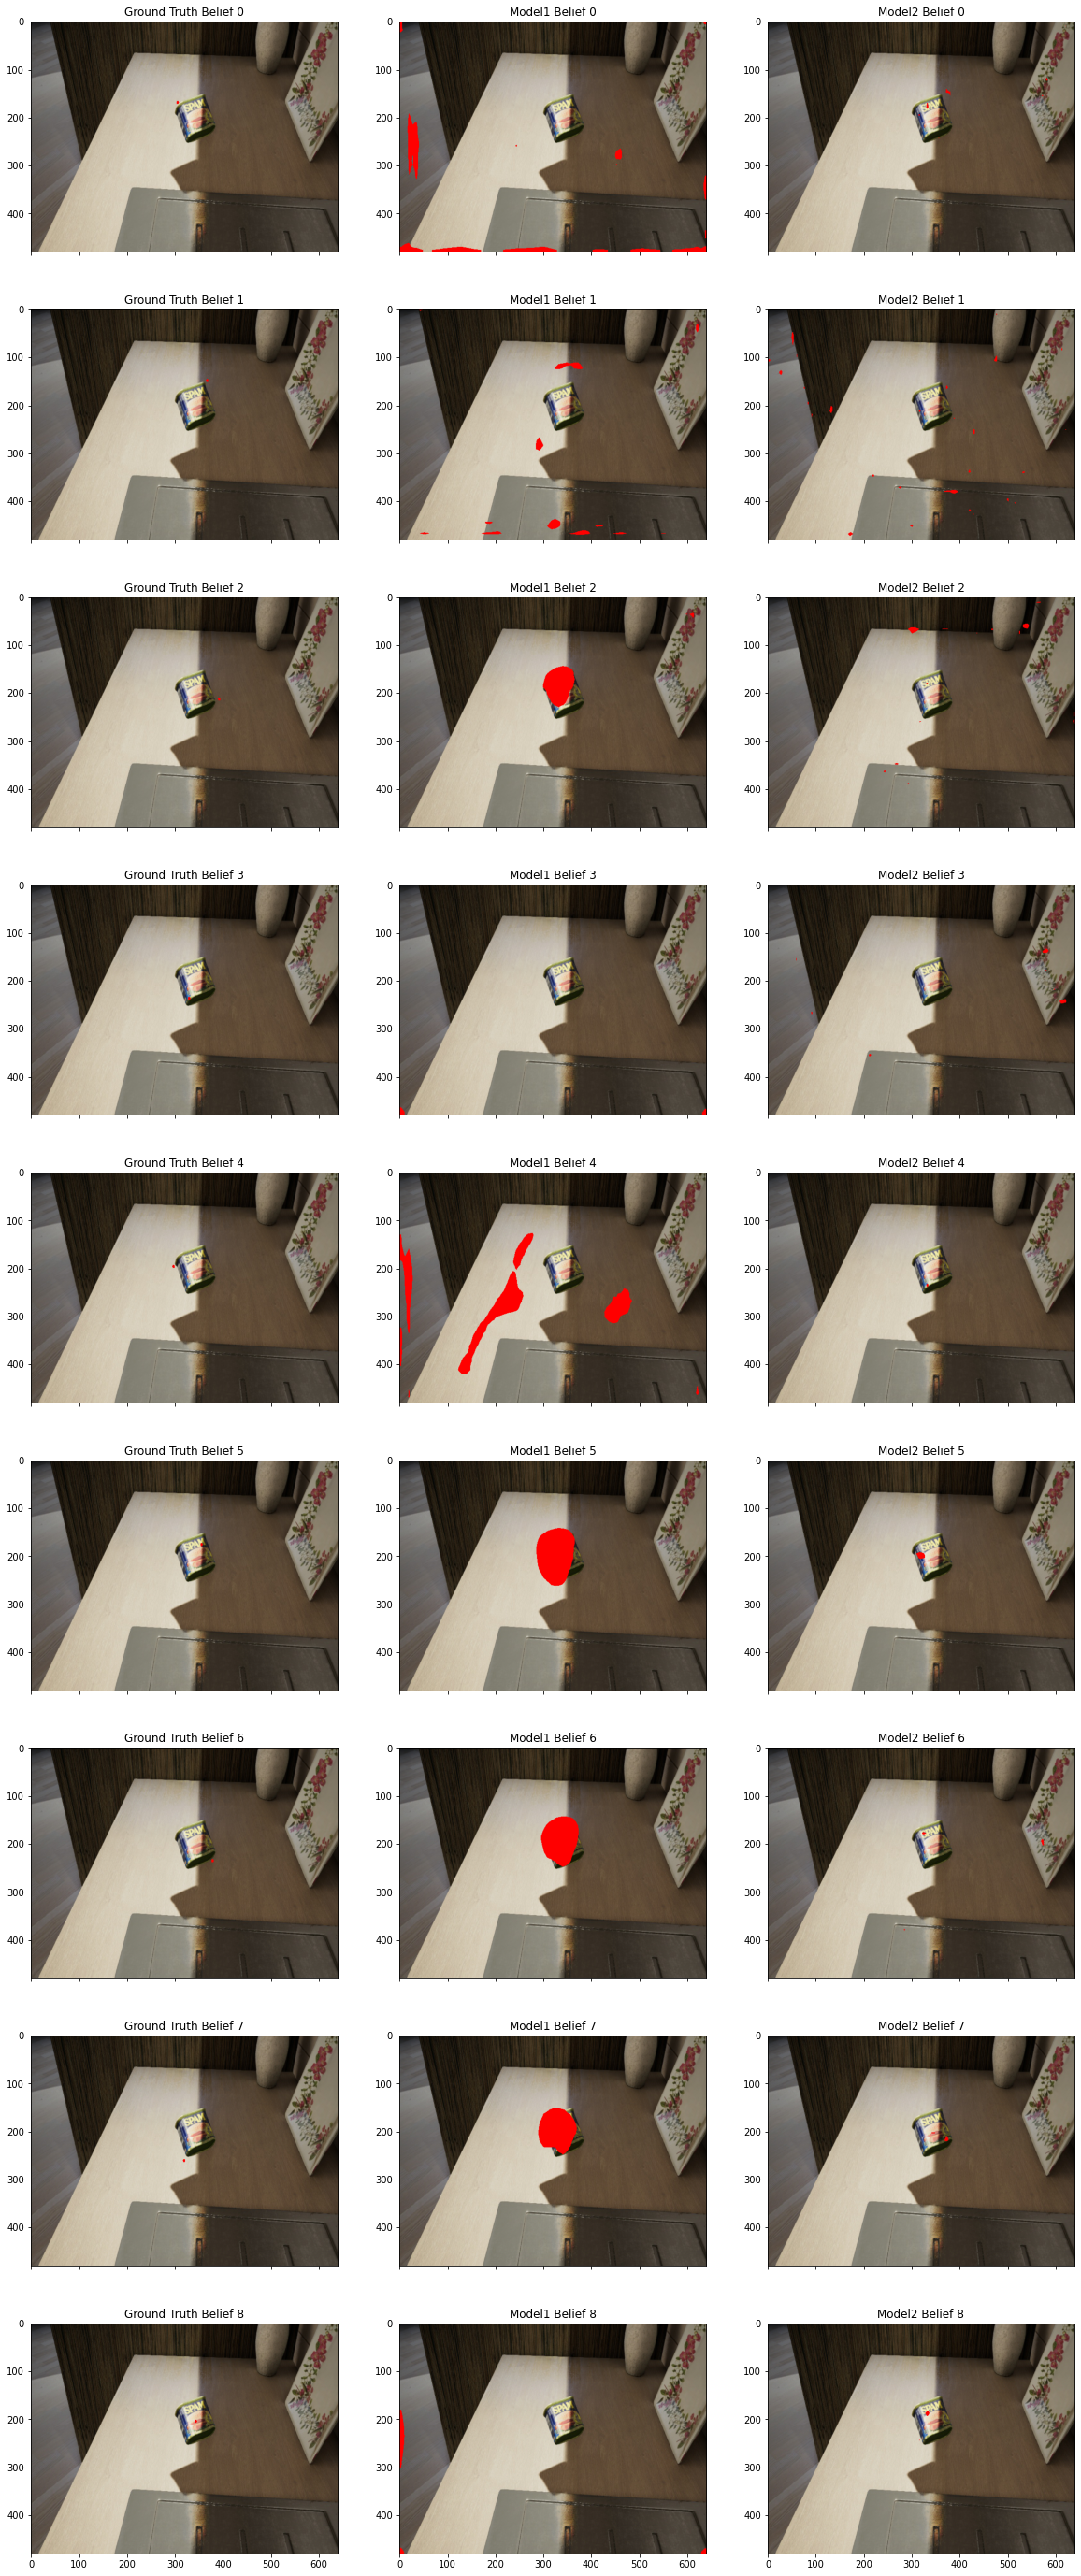

In [8]:
# Run network inference
cascade_to_viz = -5
image_tensor = transform(in_img)
image_torch = Variable(image_tensor).to(device).unsqueeze(0)

out, seg = reshape_maps(rp_model(image_torch))
beliefs_rp = out[cascade_to_viz][0].cpu() # Select the last cascade's output only

out, seg = reshape_maps(rp2_model(image_torch))
beliefs_rp2 = out[cascade_to_viz][0].cpu() # Select the last cascade's output only


compare_belief_maps(beliefsTruths, beliefs_rp, beliefs_rp2, in_img)
print(f"ResPose Epoch: {rp_epoch}")
print(f"ResPose2 Epoch: {rp2_epoch}")